# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Lathifa Alya Cahyani
- **Email:** lathifa.alyacahyani@gmail.com
- **ID Dicoding:** MC254D5X0453


## Menentukan Pertanyaan Bisnis

- Apakah ada bulan tertentu yang mengalami lonjakan besar dalam penyewaan sepeda? apa faktor yang mempengaruhi lonjakan tersebut?
- Apakah cuaca ekstrem seperti hujan lebat dan suhu tinggi menyebabkan penurunan jumlah penyewaan sepeda?
- Apa faktor yang mempengaruhi performa penyewaan sepeda pada bulan dengan jumlah sewa yang tinggi atau rendah?



## Import Semua Packages/Library yang Digunakan

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [78]:
day_df = pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [79]:
hour_df = pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengambil data menggunakan **pd.read_csv** dan menampilkan masing-masing 5 baris tabel menggunakan function **head()**.
- Setelah gathering data, saya dapat melanjutkan ke tahap analisis untuk mengidentifikasi permasalahan yang ada dalam data tersebut.

### Assessing Data

**Menilai Tabel day_df**

In [80]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Missing Value**

In [81]:
#Mengidentifikasi missing value dalam sebuah DataFrame
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Duplicate Data**

In [82]:
#Mengidentifikasi apakah terdapat duplikasi pada sebuah DataFrame.
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai Tabel hour_df**

In [83]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Missing Value**

In [84]:
#Mengidentifikasi missing value dalam sebuah DataFrame
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Duplicate Data**

In [85]:
#Mengidentifikasi apakah terdapat duplikasi pada sebuah DataFrame.
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menghitung jumlah baris duplikat pada pada tabel day_df dan hour_df menggunakan method **duplicated().sum()**, namun tidak ditemukan duplikat pada kedua tabel tersebut.
- Mengidentifikasi jumlah missing value  pada tabel day_df dan hour_df menggunakan method **isnull().sum()**, namun tidak ditemukan missing value pada kedua tabel tersebut.
- Melakukan pemeriksaan parameter statistik dari kolom numerik yang terdapat dalam day_df dan hour_df menggunakan method **describe()**.

### Cleaning Data

**Membersihkan Tabel day_df**

In [86]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Memperbaiki Tipe Data**

In [87]:
#konvert date ke format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [88]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [89]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Inaccurate Value**

In [90]:
#Mengecek apakah terdapat nilai inaccurate value pada tabel day_df
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Membersihkan Tabel hour_df**

In [91]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Memperbaiki Tipe Data**

In [92]:
#konvert date ke format datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [93]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [94]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Inaccurate Value**

In [95]:
#Mengecek apakah terdapat nilai inaccurate value pada tabel hour_df
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Mengecek tipe data pada tabel day_df dan hour_df menggunakan method **info()**, dan ditemukan kesalahan tipe data pada kolom dteday (object).
- Memperbaiki kesalahan tipe data pada kolom dteday (object) menggunakan **pd.to_datetime** menjadi (datetime).
- Mengidentifikasi inaccurate value pada tabel day_df dan hour_df menggunakan method **describe()**, namun tidak ditemukan inaccurate value pada kedua tabel tersebut.


## Exploratory Data Analysis (EDA)

### Explore ...

In [96]:
#Melihat berapa banyak jumlah kolom dan baris dari tabel day_df
day_df.shape

(731, 16)

In [97]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [98]:
#Melihat berapa banyak jumlah kolom dan baris dari tabel hour_df
hour_df.shape

(17379, 17)

In [99]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [100]:
# Melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [101]:
# Mengecek berapa banyak kategori penyewa (casual atau register) setiap bulan
kategori_penyewa = day_df.pivot_table(values=['casual', 'registered'], index='dteday', aggfunc='sum')
print(kategori_penyewa)

            casual  registered
dteday                        
2011-01-01     331         654
2011-01-02     131         670
2011-01-03     120        1229
2011-01-04     108        1454
2011-01-05      82        1518
...            ...         ...
2012-12-27     247        1867
2012-12-28     644        2451
2012-12-29     159        1182
2012-12-30     364        1432
2012-12-31     439        2290

[731 rows x 2 columns]


In [102]:
# Mengelompokkan data berdasarkan suhu dan menghitung jumlah penyewaan sepeda untuk setiap suhu
rental_by_temp = hour_df.groupby('temp')['cnt'].sum().reset_index()

display(rental_by_temp)

,temp,cnt
0,0.02,712
1,0.04,570
2,0.06,672
3,0.08,480
4,0.10,2514
5,0.12,4440
6,0.14,7605
7,0.16,15083
8,0.18,9318
9,0.20,28230


In [103]:
nama_musim = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}

# Mengganti nilai pada kolom 'season' dengan nama musim
day_df['season'] = day_df['season'].map(nama_musim)

# Mengecek berapa banyak jumlah sepeda yang disewa berdasarkan musim
season_counts = day_df['season'].value_counts()
print(season_counts)

season
Musim Gugur     188
Musim Panas     184
Musim Semi      181
Musim Dingin    178
Name: count, dtype: int64


In [104]:
nama_cuaca = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan'
}

cuaca = day_df.groupby('weathersit')['cnt'].sum()
cuaca.index = cuaca.index.map(nama_cuaca)
print(cuaca)

weathersit
Cerah      2257952
Berawan     996858
Hujan        37869
Name: cnt, dtype: int64


In [105]:
nama_hari = {
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
}

# Memetakan nilai weekday ke nama hari
day_df['day_name'] = day_df['weekday'].map(nama_hari)

# Menentukan apakah hari tersebut adalah hari kerja (weekday) atau akhir pekan (weekend)
day_df['day_type'] = day_df['weekday'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
rental_per_day_type = day_df.groupby('day_type')['cnt'].sum().reset_index()

display(rental_per_day_type)

,day_type,cnt
0,Weekday,2327082
1,Weekend,965597


In [106]:
# Memfilter data antara bulan Januari 2011 dan Desember 2012
bulan = day_df[(day_df['dteday'].dt.year >= 2011) & (day_df['dteday'].dt.year <= 2012)]
bulan['Year'] = bulan['dteday'].dt.year
bulan['Month'] = bulan['dteday'].dt.month

# Mengkategorikan nomor bulan ke nama bulan
bulan['Month'] = bulan['Month'].apply(lambda x: pd.to_datetime(f'2022-{x}-01').strftime('%B'))

# Menghitung total sewa perbulan
rental_bulanan = bulan.groupby(['Year', 'Month'])['cnt'].sum().reset_index()

# Mengurutkan datanya berdasarkan tahun dan bulan
rental_bulanan['Month'] = pd.to_datetime(rental_bulanan['Month'], format='%B').dt.month
rental_bulanan = rental_bulanan.sort_values(by=['Year', 'Month']).reset_index(drop=True)
rental_bulanan['Month'] = rental_bulanan['Month'].apply(lambda x: pd.to_datetime(f'2022-{x}-01').strftime('%B'))

display(rental_bulanan)

,Year,Month,cnt
0,2011,January,38189
1,2011,February,48215
2,2011,March,64045
3,2011,April,94870
4,2011,May,135821
5,2011,June,143512
6,2011,July,141341
7,2011,August,136691
8,2011,September,127418
9,2011,October,123511


In [107]:
# Menghitung korelasi antar kolom numerik dalam dataset
correlation_matrix = day_df.corr(numeric_only=True)
display(correlation_matrix)

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
yr,0.866025,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


**Insight:**
- Melihat berapa banyak jumlah kolom dan baris dari tabel day_df menggunakan method **.shape**, dan ditemukan tabel day_df memiliki (731 baris, 16 kolom).
- Melihat berapa banyak jumlah kolom dan baris dari tabel hour_df menggunakan method **.shape**, dan ditemukan tabel day_df memiliki (17379 baris, 17 kolom).
- Mengecek berapa banyak kategori penyewa (casual atau register) setiap bulan menggunakan **pivot table** dan tabel day_df.
- Mengelompokkan data berdasarkan suhu dan menghitung jumlah penyewaan sepeda untuk setiap suhu menggunakan method **groupby()** berdasarkan nilai dikolom "temp".
- Mengecek berapa banyak jumlah sepeda yang disewa berdasarkan musim menggunakan method **value_counts()**.
- Mengelompokkan data berdasarkan cuaca dan menghitung jumlah penyewaan sepeda untuk setiap cuaca menggunakan method **groupby()** berdasarkan nilai dikolom "weathersit".
- Menentukan apakah hari tersebut adalah hari kerja (weekday) atau akhir pekan (weekend) menggunakan function **lambda**.
- Menghitung jumlah sepeda yang disewa menggunakan method **groupby()** untuk menentukan tipe harinya dan **.sum()** untuk menghitung total sepeda yang disewa.
- Memfilter data antara bulan Januari 2011 dan Desember 2012 menggunakan operator logika "&". Lalu menghitung total sewa perbulan menggunakan kategori **groupby()** dan **sum()** untuk hitung total.
- Registered dan count memiliki korelasi yang sangat tinggi dengan nilai (0.945517).
- Holiday memiliki korelasi yang rendah dengan banyak variabel, dan hasil korelasi ini menunjukkan bahwa hari libur tidak memiliki pengaruh terhadap variabel lain seperti jumlah sewa.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

> Tambahkan blockquote



**Laporan Jumlah Sewa Sepeda Bulanan berdasarkan data harian.**

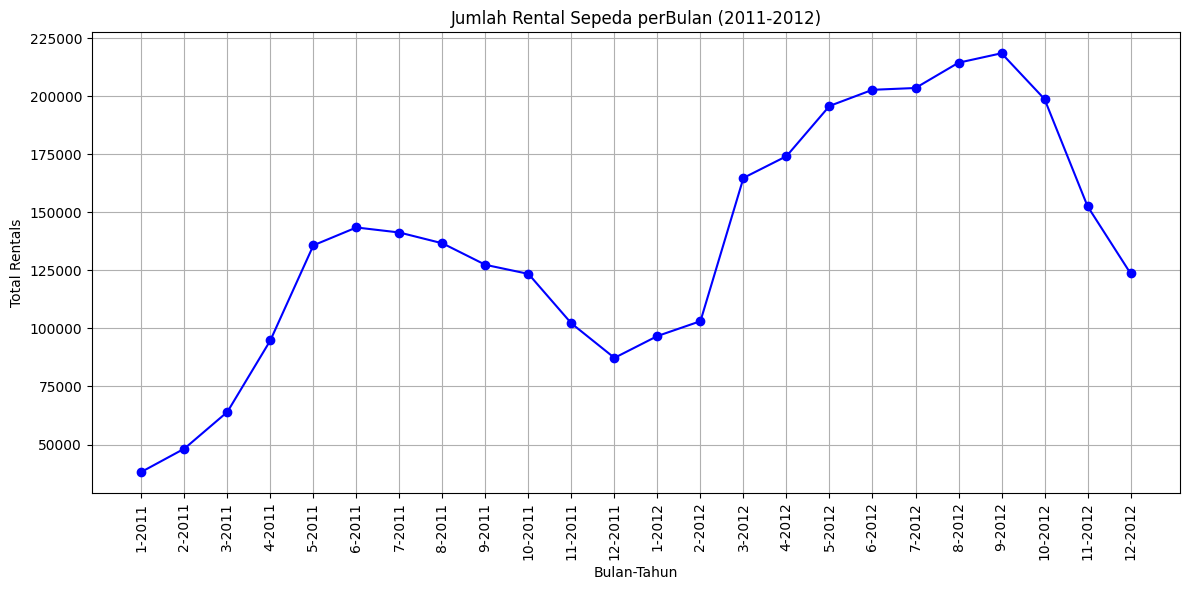

In [108]:
bulan = day_df[(day_df['dteday'].dt.year >= 2011) & (day_df['dteday'].dt.year <= 2012)]
bulan['Year'] = bulan['dteday'].dt.year
bulan['Month'] = bulan['dteday'].dt.month

# Menghitung total sewa sepeda perbulan
rental_bulanan = bulan.groupby(['Year', 'Month'])['cnt'].sum().reset_index()
rental_bulanan = rental_bulanan.sort_values(by=['Year', 'Month'])
plt.figure(figsize=(12, 6))
plt.plot(rental_bulanan['Month'].astype(str) + '-' + rental_bulanan['Year'].astype(str),
         rental_bulanan['cnt'], marker='o', color='blue')
plt.title('Jumlah Rental Sepeda perBulan (2011-2012)')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Total Rentals')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

Jumlah penyewaan sepeda pada cuaca ekstrem: 30791
Jumlah penyewaan sepeda pada cuaca normal: 766922


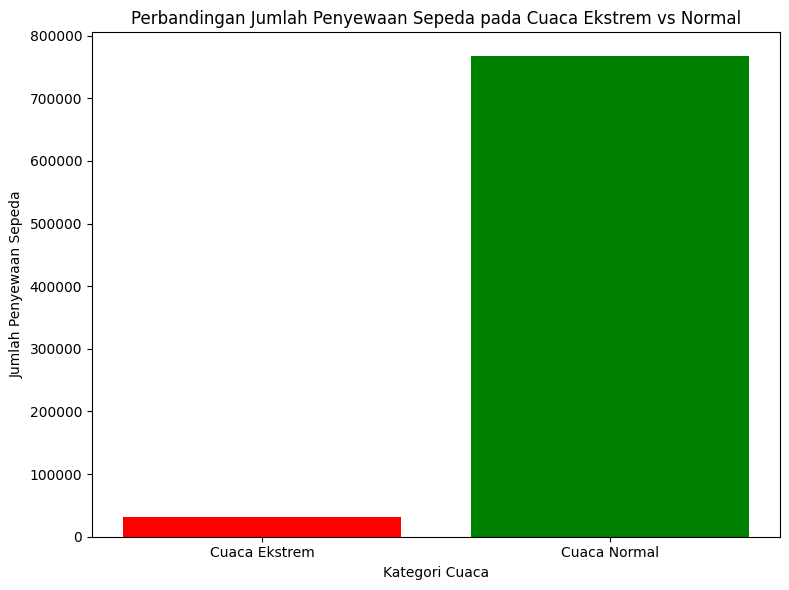

In [109]:
cuaca_ekstrem = day_df[(day_df['weathersit'] == 3) & (day_df['temp'] > 0.4)]
cuaca_normal = day_df[(day_df['weathersit'] != 3) & (day_df['temp'] <= 0.4)]

# Menghitung jumlah penyewaan sepeda pada cuaca ekstrem dan normal
rental_ekstrim = cuaca_ekstrem['cnt'].sum()
rental_normal = cuaca_normal['cnt'].sum()
print(f'Jumlah penyewaan sepeda pada cuaca ekstrem: {rental_ekstrim}')
print(f'Jumlah penyewaan sepeda pada cuaca normal: {rental_normal}')

# Visualisasi perbandingan jumlah penyewaan sepeda pada cuaca ekstrem dan normal
categories = ['Cuaca Ekstrem', 'Cuaca Normal']
rentals = [rental_ekstrim, rental_normal]
plt.figure(figsize=(8, 6))
plt.bar(categories, rentals, color=['red', 'green'])
plt.title('Perbandingan Jumlah Penyewaan Sepeda pada Cuaca Ekstrem vs Normal')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.tight_layout()
plt.show()

### Pertanyaan 3:

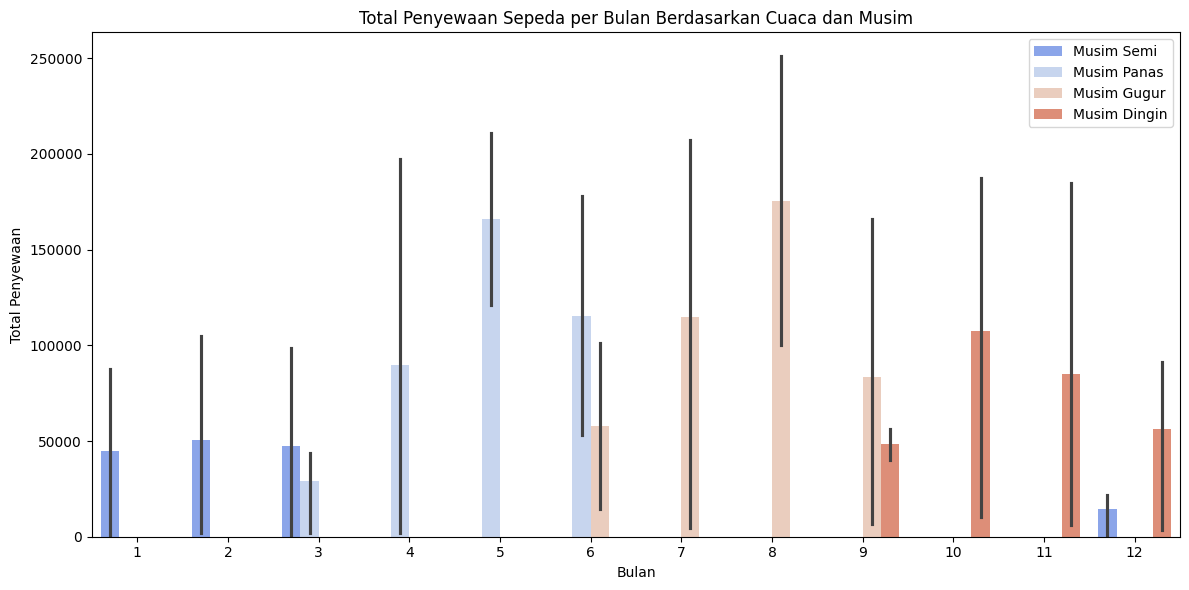

In [114]:
# Ekstrak Tahun dan Bulan ke dalam kolom terpisah pada day_df
day_df['Year'] = day_df['dteday'].dt.year
day_df['mnth'] = day_df['dteday'].dt.month

# Menghitung total penyewaan sepeda per bulan dengan cuaca dan musim
monthly_rentals = day_df.groupby(['mnth', 'weathersit', 'season'])['cnt'].sum().reset_index()

# Menampilkan bulan dengan penyewaan tertinggi dan terendah
high_rentals_month = monthly_rentals[monthly_rentals['cnt'] == monthly_rentals['cnt'].max()]
low_rentals_month = monthly_rentals[monthly_rentals['cnt'] == monthly_rentals['cnt'].min()]

# Visualisasi total penyewaan sepeda per bulan dengan cuaca dan musim
plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='cnt', data=monthly_rentals, hue='season', palette='coolwarm')
plt.title('Total Penyewaan Sepeda per Bulan Berdasarkan Cuaca dan Musim')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
- **Tren jumlah penyewaan sepeda per bulan (2011-2012)** menunjukan bahwa jumlah penyewaan sepeda meningkat pesat dari awal tahun 2011 hingga puncaknya pada pertengahan 2012, kemudian mengalami penurunan yang signifikan setelahnya. Peningkatan yang tajam pada bulan bulan tertentu menunjukkan adanya musim atau peristiwa yang mendorong lebih banyak orang untuk menyewa sepeda.
- **Grafik perbandingan jumlah penyewaan sepeda pada cuaca ekstrem dengan cuaca normal** menunjukkan bahwa jumlah penyewaan sepeda pada cuaca normal sangat tinggi dibandingkan dengan cuaca ekstrem. Cuaca ekstrem ini seperti hujan lebat atau suhu yang tinggi, dan hanya menghasilkan sedikit terhadap total penyewaan sepeda.
- **Grafik total penyewaan sepeda berdasarkan cuaca dan musim** terlihat bahwa pada musim panas dan musim gugur, jumlah penyewaan sepeda lebih tinggi, sementara pada musim semi dan musim dingin, penyewaan sepeda lebih rendah. Keberadaan variasi ini menjelaskan bahwa cuaca memainkan peran penting dalam keputusan penyewaan sepeda, dengan musim panas cenderung meningkatkan aktifitas penyewaan sepeda.

## Analisis Lanjutan (Opsional)

In [111]:
# Fungsi untuk mengkategorikan penyewaan berdasarkan frekuensi
def kategori_penyewa(row):
    if row['cnt'] > 1000:
        return 'Cluster A (Tinggi)'
    elif 700 <= row['cnt'] <= 1000:
        return 'Cluster B (Sedang)'
    else:
        return 'Cluster C (Rendah)'

# Menambahkan kolom 'Cluster' ke dataframe
day_df['Cluster'] = day_df.apply(kategori_penyewa, axis=1)
print(day_df[['dteday', 'cnt', 'Cluster']])

        dteday   cnt             Cluster
0   2011-01-01   985  Cluster B (Sedang)
1   2011-01-02   801  Cluster B (Sedang)
2   2011-01-03  1349  Cluster A (Tinggi)
3   2011-01-04  1562  Cluster A (Tinggi)
4   2011-01-05  1600  Cluster A (Tinggi)
..         ...   ...                 ...
726 2012-12-27  2114  Cluster A (Tinggi)
727 2012-12-28  3095  Cluster A (Tinggi)
728 2012-12-29  1341  Cluster A (Tinggi)
729 2012-12-30  1796  Cluster A (Tinggi)
730 2012-12-31  2729  Cluster A (Tinggi)

[731 rows x 3 columns]


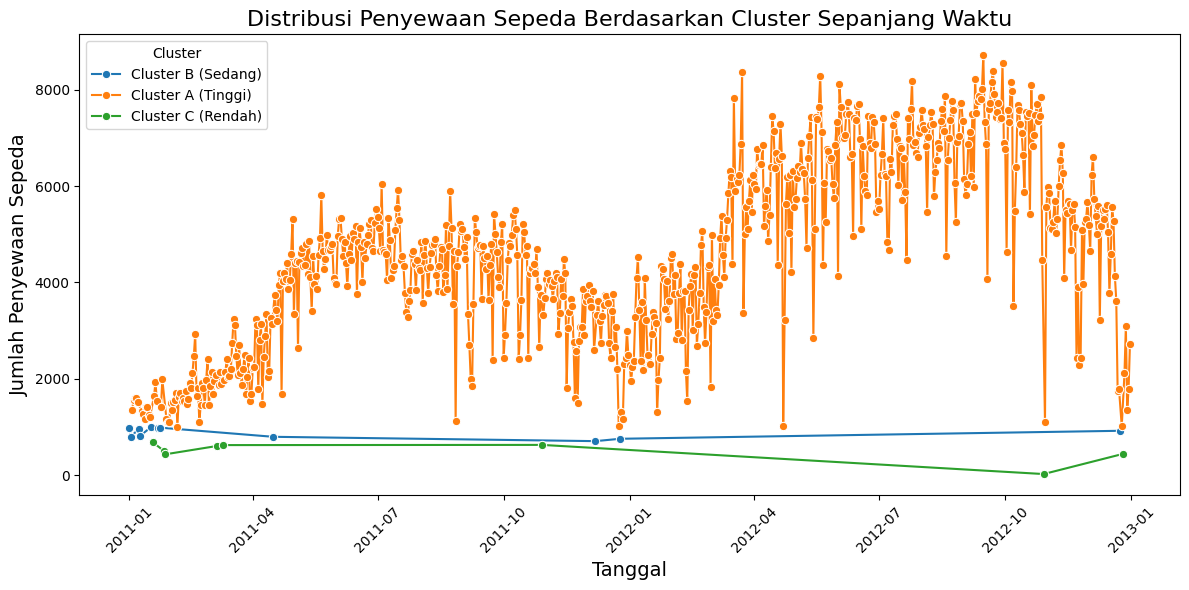

In [112]:
# Mengelompokkan data berdasarkan tanggal dan cluster untuk menghitung jumlah penyewaan percluster
cluster_per_day = day_df.groupby(['dteday', 'Cluster'])['cnt'].sum().reset_index()

# Menampilkan visualisasi distribusi penyewaan sepeda percluster sepanjang waktu menggunakan line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', hue='Cluster', data=cluster_per_day, marker='o')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Cluster Sepanjang Waktu', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Terlihat jelas dari visualisasi distribusi penyewaan sepeda dari waktu ke waktu, yang dibagi menjadi tiga klaster bahwa Klaster A (Tinggi) memiliki jumlah penyewaan terbanyak, dengan jumlah yang meningkat dari waktu ke waktu. Hal ini menunjukkan bahwa penyewaan sepeda dengan frekuensi tinggi lebih sering terjadi pada waktu-waktu yang berbeda, terutama antara pertengahan tahun 2011 dan 2012. Namun, Klaster B (Sedang) dan Klaster C (Rendah) menunjukkan tingkat penyewaan yang lebih rendah, sedangkan tingkat penyewaan Klaster B sedikit meningkat pada waktu-waktu tertentu. Sementara tingkat penyewaan Klaster C tetap rendah sepanjang waktu. Klaster B dan Klaster C menunjukkan pola yang lebih konsisten, penyewaan sepeda di Klaster A dipengaruhi oleh kondisi musiman atau acara tertentu.

## Conclusion

- **Kesimpulan pertanyaan 1** : Lonjakan besar dalam penyewaan sepeda terjadi pada bulan Mei 2012 dengan faktor utama yang mempengaruhi kemungkinan besar adalah cuaca dan suhu yang mendukung aktivitas luar ruangan. Selain itu, faktor musim semi atau awal musim panas yang meningkatkan jumlah kegiatan luar ruangan.
- **Kesimpulan pertanyaan 2** : Jumlah penyewaan sepeda pada cuaca normal jauh lebih tinggi dibandingan dengan cuaca ekstrem. Pada kategori cuaca ekstrem seperti hujan lebat atau suhu yang tinggi menunjukkan jumlah penyewaan sepeda sangat rendah karena kondisi cuaca tidak mendukung aktivitas luar ruangan dan juga faktor kenyamanan serta keselamatan, sehingga menyebabkan penurunan dalam jumlah penyewaan sepeda.
- **Kesimpulan pertanyaan 3** : Faktor yang mempengaruhi performa penyewaan sepeda pada bulan dengan jumlah penyewaan yang tinggi atau rendah dipengaruhi oleh kondisi cuaca dan musim. Pada bulan dengan jumlah penyewaan tinggi, seperti di musim panas dan musim gugur (bulan Juli hingga Oktober), cuaca yang lebih hangat mendukung aktivitas luar ruangan, termasuk penyewaan sepeda. Sementara itu, pada bulan dengan penyewaan rendah, seperti musim dingin (bulan Desember hingga Februari), cuaca yang lebih dingin dan hujan cenderung mengurangi minat masyarakat untuk bersepeda. Oleh karena itu, cuaca dan musim yang nyaman untuk beraktivitas luar ruangan berperan penting dalam meningkatkan jumlah penyewaan sepeda.